In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [42]:
# Parámetros
num_especies = 100
num_pasos_tiempo = 50000
rho = 0.01 # probabilidad de reordenamiento
lambda_val = 0.001 # probabilidad de perdida de función
tau0 = 0.01 # probabilidad max de trasnferencia horizontal
alpha = 0.004

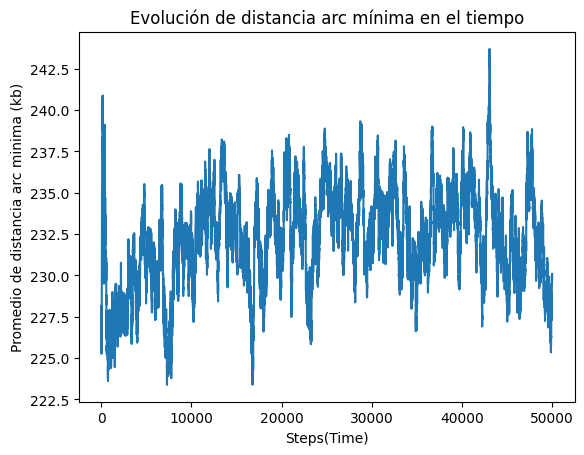

3

In [44]:
# inicializar la población con posiciones genéticas aleatorias
def inicializar_poblacion():
    poblacion = []
    for _ in range(num_especies):
        genoma = sorted(random.sample(range(10, 901), 10))  # 10 genes en el genoma
        poblacion.append(genoma)
    return poblacion

# reorganizar el genoma con probabilidad rho
def reorganizar_genoma(genoma):
    if np.random.rand() < rho:
        indice_gen = np.random.randint(len(genoma))
        nueva_posicion = np.random.randint(1, 901)
        genoma[indice_gen] = nueva_posicion
        genoma.sort()

# destruir la función genética con probabilidad lambda
def destruir_funcion_genetica(poblacion, especies_positivas):
    especies_a_eliminar = []
    for i, especie in enumerate(poblacion):
        if np.random.rand() < lambda_val:
            especies_a_eliminar.append(i)
            if i in especies_positivas:
                especies_positivas.remove(i)
    for index in sorted(especies_a_eliminar, reverse=True):
        del poblacion[index]

# calcular la distancia arc mínima entre genes en el genoma
def calcular_distancia_minima_arco(genoma):
    return max(np.diff(genoma))  # Longitud del genoma menos el intervalo más largo entre pares de genes vecinos

# Función para realizar la transferencia horizontal
def transferencia_horizontal(poblacion, especies_positivas):
    num_especies_actuales = len(poblacion)
    if num_especies_actuales < 900:
        for especie in poblacion:
            distancia_minima_arco = calcular_distancia_minima_arco(especie)
            prob_transferencia = tau0 * np.exp(-alpha * distancia_minima_arco)
            if np.random.rand() < prob_transferencia:
                genoma_donante = random.choice(poblacion)
                nueva_especie = list(genoma_donante)
                poblacion.append(nueva_especie)
                especies_positivas.add(num_especies_actuales)

# calcular la distancia arc mínima promedio entre genes en la población
def calcular_distancia_minima_promedio(poblacion):
    distancias_minimas_arco = [calcular_distancia_minima_arco(especie) for especie in poblacion]
    return np.mean(distancias_minimas_arco)

# Función principal para simular el modelo
def simulacion():
    poblacion = inicializar_poblacion()
    especies_positivas = set(range(num_especies))  # Conjunto de especies positivas
    distancias_promedio = []
    for paso_tiempo in range(num_pasos_tiempo):
        for especie in poblacion:
            reorganizar_genoma(especie) # simula cambios aleatorios en los genomas.
        destruir_funcion_genetica(poblacion, especies_positivas) # simular la pérdida de funciones genéticas en algunas especies
        transferencia_horizontal(poblacion, especies_positivas)
        distancia_minima_promedio = calcular_distancia_minima_promedio(poblacion)
        distancias_promedio.append(distancia_minima_promedio)

    # Graficar los resultados
    plt.plot(range(num_pasos_tiempo), distancias_promedio)
    plt.xlabel('Steps(Time)')
    plt.ylabel('Promedio de distancia arc minima (kb)')
    plt.title('Evolución de distancia arc mínima en el tiempo')
    plt.show()
    return len(especies_positivas)


simulacion()

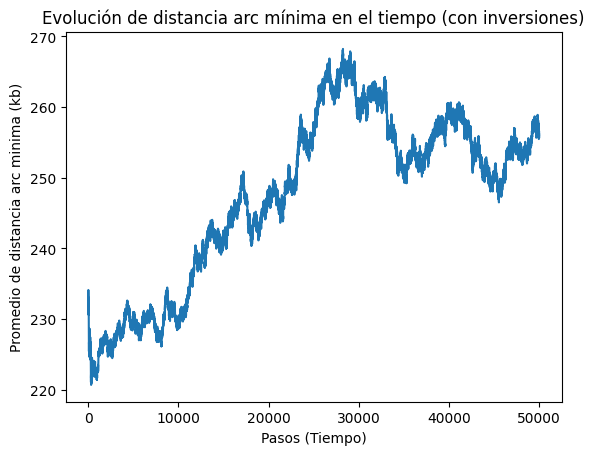

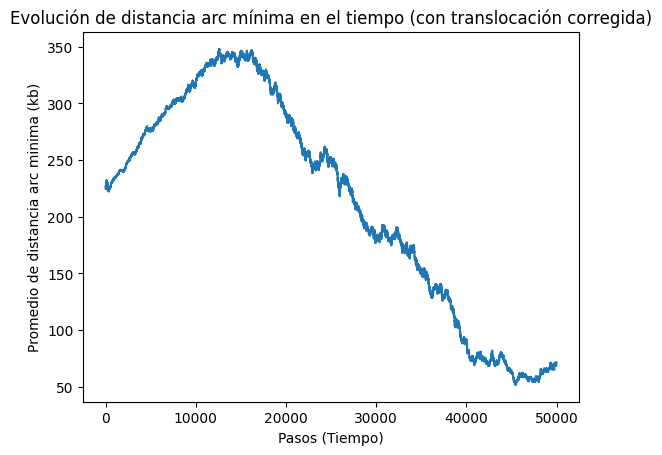

4

In [45]:
M = 100 # longitud total del genoma
e = 50 # rango de tolerancia para el desequilibrio entre el origen y el término del genoma
       # determinar la viabilidad de una inversión genética

# reorganizar el genoma con probabilidad rho
def reorganizar_genoma(genoma):
    global M
    g = len(genoma)
    if np.random.rand() < rho * g / M:
        indice_gen = np.random.randint(len(genoma))
        nueva_posicion = np.random.randint(1, M + 1)
        genoma[indice_gen] = nueva_posicion
        genoma.sort()

# verificar si una inversión es viable
def inversion_viable(a, b):
    return ((0 < a < M / 2 and 0 < b < M / 2) or
            (M / 2 < a < M and M / 2 < b < M) or
            (M - e < a + b < M + e))

# realizar inversiones en el genoma
def realizar_inversion(genoma):
    a = random.randint(1, M)
    b = random.randint(1, M)
    a -= 0.5
    b -= 0.5
    if inversion_viable(a, b):
        for i in range(len(genoma)):
            if a < genoma[i] < b:
                genoma[i] = a + b - genoma[i]
        genoma.sort()

# simular el modelo con inversión
def simulacion_inversion():
    poblacion = inicializar_poblacion()
    especies_positivas = set(range(num_especies))
    distancias_promedio = []
    for paso_tiempo in range(num_pasos_tiempo):
        for especie in poblacion:
            realizar_inversion(especie)
        destruir_funcion_genetica(poblacion, especies_positivas)
        transferencia_horizontal(poblacion, especies_positivas)
        distancia_minima_promedio = calcular_distancia_minima_promedio(poblacion)
        distancias_promedio.append(distancia_minima_promedio)

    # Graficar los resultados
    plt.plot(range(num_pasos_tiempo), distancias_promedio)
    plt.xlabel('Pasos (Tiempo)')
    plt.ylabel('Promedio de distancia arc minima (kb)')
    plt.title('Evolución de distancia arc mínima en el tiempo (con inversiones)')
    plt.show()
    return len(especies_positivas)


# simular el modelo con translocación corregida
def simulacion_translocacion_corregida():
    poblacion = inicializar_poblacion()
    especies_positivas = set(range(num_especies))
    distancias_promedio = []
    for paso_tiempo in range(num_pasos_tiempo):
        for especie in poblacion:
            reorganizar_genoma(especie)
        destruir_funcion_genetica(poblacion, especies_positivas)
        transferencia_horizontal(poblacion, especies_positivas)
        distancia_minima_promedio = calcular_distancia_minima_promedio(poblacion)
        distancias_promedio.append(distancia_minima_promedio)

    plt.plot(range(num_pasos_tiempo), distancias_promedio)
    plt.xlabel('Pasos (Tiempo)')
    plt.ylabel('Promedio de distancia arc minima (kb)')
    plt.title('Evolución de distancia arc mínima en el tiempo (con translocación corregida)')
    plt.show()
    return len(especies_positivas)

simulacion_inversion()
simulacion_translocacion_corregida()